# MovieLens 1M Dataset

GroupLens Research provides a number of collections of movie ratings collected from users of MovieLens in the Late 1990s and early 2000s. The MovieLens 1M dataset contains 1million ratings collected from 6,000 users on 4,000 movies. It's spread across three tables: ratings, user information, and movie information. From this dataset I am going to analyse the following: 
(1) Top Movies among Males and Females. 
(2) Measuring Rating Disagreement.
(3) Most popular Genres.
(4) User vs Movies distribution.
(5) Movies recommendar engine.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



pd.options.display.max_rows = 10

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', engine='python', header=None, names=unames)

In [3]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, engine='python', names=rnames)

In [4]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', encoding='latin-1', skiprows=3114, header=None, engine='python', names=mnames)

In [5]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
movies[:5]

,movie_id,title,genres
0,3183,"Third Miracle, The (1999)",Drama
1,3184,Montana (1998),Action|Comedy|Crime|Drama
2,3185,Snow Falling on Cedars (1999),Drama
3,3186,"Girl, Interrupted (1999)",Drama
4,3187,Trans (1998),Drama


Suppose we want to compute mean ratings for a particular movie by sex age.

In [8]:
data = pd.merge(pd.merge(ratings, users), movies)

In [9]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
1,5,3408,3,978242323,M,25,20,55455,Erin Brockovich (2000),Drama
2,6,3408,5,978238230,F,50,9,55117,Erin Brockovich (2000),Drama
3,9,3408,4,978225570,M,25,17,61614,Erin Brockovich (2000),Drama
4,10,3408,4,978225070,F,35,1,95370,Erin Brockovich (2000),Drama
...,...,...,...,...,...,...,...,...,...,...
146852,5313,3656,5,960920392,M,56,0,55406,Lured (1947),Crime
146853,5334,3323,3,960796159,F,56,13,46140,Chain of Fools (2000),Comedy|Crime
146854,5334,3382,5,960796159,F,56,13,46140,Song of Freedom (1936),Drama
146855,5494,3530,4,959816296,F,35,17,94306,Smoking/No Smoking (1993),Comedy


In [10]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [11]:
mean_ratings

gender,F,M
title,,
...And Justice for All (1979),3.828571,3.689024
28 Days (2000),3.209424,2.977707
3 Strikes (2000),NaN,2.750000
8 1/2 Women (1999),2.857143,2.404762
Abbott and Costello Meet Frankenstein (1948),3.365854,3.460606
...,...,...
X-Men (2000),3.682310,3.851702
X: The Unknown (1956),2.250000,3.125000
"Year My Voice Broke, The (1987)",4.000000,3.705882


Now, I will filter down to movies that received atleast 250 ratings:

In [12]:
ratings_by_title = data.groupby('title').size()

In [13]:
ratings_by_title

title
...And Justice for All (1979)                    199
28 Days (2000)                                   505
3 Strikes (2000)                                   4
8 1/2 Women (1999)                                49
Abbott and Costello Meet Frankenstein (1948)     206
                                                ... 
X-Men (2000)                                    1511
X: The Unknown (1956)                             12
Year My Voice Broke, The (1987)                   27
Zachariah (1971)                                   2
Zed & Two Noughts, A (1985)                       29
Length: 740, dtype: int64

In [14]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [15]:
active_titles

Index(['28 Days (2000)', 'Agnes of God (1985)', 'Air America (1990)',
       'Alien Nation (1988)', 'Alive (1993)', 'Almost Famous (2000)',
       'American Gigolo (1980)', 'American Graffiti (1973)',
       'American Psycho (2000)', 'Angel Heart (1987)',
       ...
       'Wayne's World 2 (1993)', 'What About Bob? (1991)',
       'What Lies Beneath (2000)', 'Where Eagles Dare (1969)',
       'Where the Heart Is (2000)', 'White Christmas (1954)',
       'White Men Can't Jump (1992)', 'Whole Nine Yards, The (2000)',
       'Wonder Boys (2000)', 'X-Men (2000)'],
      dtype='object', name='title', length=198)

Now, we can use index of titles receiving atleast 250ratings to select rows from mean_ratings:

In [16]:
mean_ratings = mean_ratings.loc[active_titles]

In [17]:
mean_ratings

gender,F,M
title,,
28 Days (2000),3.209424,2.977707
Agnes of God (1985),3.534884,3.244898
Air America (1990),2.823529,2.741176
Alien Nation (1988),3.433333,3.195946
Alive (1993),3.469388,3.376866
...,...,...
White Christmas (1954),3.990196,3.727811
White Men Can't Jump (1992),3.028777,3.231061
"Whole Nine Yards, The (2000)",3.296552,3.404814


Now, we can see the top films among female viewars;

In [18]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [19]:
top_female_ratings

gender,F,M
title,,
Creature Comforts (1990),4.513889,4.272277
City Lights (1931),4.452055,4.363636
Double Indemnity (1944),4.282051,4.468354
Hard-Boiled (Lashou shentan) (1992),4.259259,4.126667
Modern Times (1936),4.227273,4.238494
...,...,...
Hollow Man (2000),2.382716,2.577160
Porky's (1981),2.296875,2.836364
Eye of the Beholder (1999),2.181818,2.115789


In [20]:
performance = top_female_ratings['F']
subset = performance[:20]
y = subset.index

x = subset.values


performance



title
Creature Comforts (1990)                                          4.513889
City Lights (1931)                                                4.452055
Double Indemnity (1944)                                           4.282051
Hard-Boiled (Lashou shentan) (1992)                               4.259259
Modern Times (1936)                                               4.227273
                                                                    ...   
Hollow Man (2000)                                                 2.382716
Porky's (1981)                                                    2.296875
Eye of the Beholder (1999)                                        2.181818
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)    2.152174
Battlefield Earth (2000)                                          1.574468
Name: F, Length: 198, dtype: float64

Text(0, 0.5, 'Top Movies Among Female viewars')

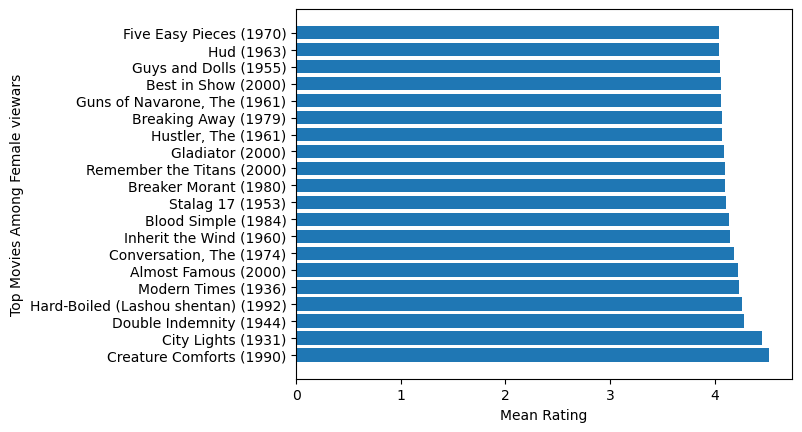

In [21]:
#import seaborn as sns; sns.set()


import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
plt.barh(y, x)

plt.xlabel('Mean Rating')
plt.ylabel('Top Movies Among Female viewars')


From here we can see that the movie "Creature Comforts(1990)" is the top movie among female, followed by "City Lights(1931)" and so on and so forth. 

In [22]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
performance = top_male_ratings['M']
subset = performance[:20]
a = subset.index

b = subset.values


performance

title
Double Indemnity (1944)                                           4.468354
City Lights (1931)                                                4.363636
Inherit the Wind (1960)                                           4.331606
Hustler, The (1961)                                               4.274667
Creature Comforts (1990)                                          4.272277
                                                                    ...   
Encino Man (1992)                                                 2.488789
Freejack (1992)                                                   2.416667
Teenage Mutant Ninja Turtles II: The Secret of the Ooze (1991)    2.121951
Eye of the Beholder (1999)                                        2.115789
Battlefield Earth (2000)                                          1.616949
Name: M, Length: 198, dtype: float64

Text(0, 0.5, 'Top Movies Among Male viewars')

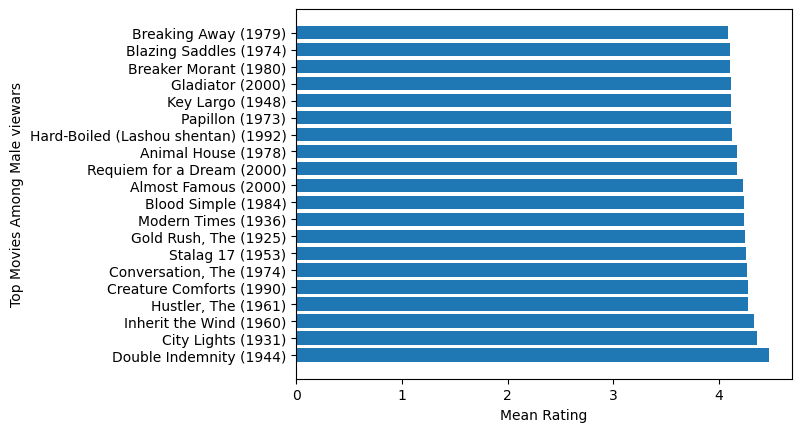

In [23]:
plt.barh(a, b)

plt.xlabel('Mean Rating')
plt.ylabel('Top Movies Among Male viewars')

From here we can see that the movie "Double Indemnity(1944)" is the top movie among male, followed by "City Lights(1931)" and so on and so forth. This analysis shows that "City Lights" remains the second among both females and males. 

# (2) Measuring Rating Disagreement

Now we will find the movies that are most divisive between male and female viewars.

In [24]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' yields the movies with the greatest rating difference so that we can see which ones were preferred by women:

In [25]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:6]

gender,F,M,diff
title,,,
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Guys and Dolls (1955),4.051724,3.583333,-0.468391
"Skulls, The (2000)",3.053333,2.621145,-0.432188
"Muppets Take Manhattan, The (1984)",3.762376,3.395833,-0.366543
Footloose (1984),3.311594,2.952862,-0.358732
"Prince of Tides, The (1991)",3.347518,3.005556,-0.341962


Reversing the order of the rows and again slicing off the top 6 rows, we get the movies preferred by men that women didn't rate as highly:  

In [26]:
sorted_by_diff[::-1][:6]

gender,F,M,diff
title,,,
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
"Hidden, The (1987)",3.137931,3.745098,0.607167
Caddyshack (1980),3.396135,3.969737,0.573602
For a Few Dollars More (1965),3.409091,3.953795,0.544704
Porky's (1981),2.296875,2.836364,0.539489
Animal House (1978),3.628906,4.167192,0.538286


Lastly, we find the movies that elicited the most disagreement among viewars, independent of gender identification:

In [27]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title

title
28 Days (2000)                  0.920278
Agnes of God (1985)             0.936249
Air America (1990)              0.938463
Alien Nation (1988)             0.915587
Alive (1993)                    0.847169
                                  ...   
White Christmas (1954)          0.952285
White Men Can't Jump (1992)     0.938178
Whole Nine Yards, The (2000)    0.963258
Wonder Boys (2000)              0.880473
X-Men (2000)                    0.915067
Name: rating, Length: 198, dtype: float64

In [28]:
rating_std_by_title.sort_values(ascending=False)[:6]

title
Hellraiser (1987)                 1.243046
Scary Movie (2000)                1.224024
American Psycho (2000)            1.190698
Pee-wee's Big Adventure (1985)    1.185933
Me, Myself and Irene (2000)       1.179733
Skulls, The (2000)                1.161016
Name: rating, dtype: float64

# (3) Most popular genres

In [29]:
popular_genres = data[['genres', 'rating']].groupby('genres').sum().reset_index()
popular_genres = popular_genres.sort_values('rating', ascending=False).head(n=10)
popular_genres

,genres,rating
51,Comedy,87061
76,Drama,61121
55,Comedy|Drama,39865
22,Action|Sci-Fi,20456
104,Thriller,16332
14,Action|Drama,15756
24,Action|Thriller,14311
65,Comedy|Romance,13280
0,Action,12918
85,Drama|Thriller,10681


Text(0.5, 0, 'Rating')

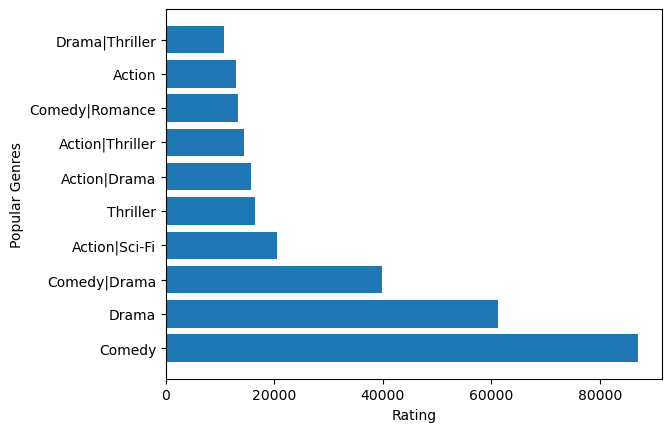

In [30]:
y = popular_genres['genres'].values
x = popular_genres['rating'].values
plt.barh(y, x)
plt.ylabel('Popular Genres')
plt.xlabel('Rating')

We can see that Comedy is by far the most popular genres.

# (4) User vs. Movies Distribution

In [31]:
user_movie_rating_distribution = data[['user_id', 'title']].groupby('user_id').count().reset_index().sort_values(by='title', ascending = False)
user_movie_rating_distribution.title.describe()

count    5972.000000
mean       24.590924
std        30.624488
min         1.000000
25%         6.000000
50%        14.000000
75%        31.000000
max       437.000000
Name: title, dtype: float64

This gives us some important information about how the movie rating are distributed across the users.
We see that on an average, a user will rate to 24 movies, while some users have a low voracious appetite for
movie diversification.

In [32]:
user_movie_rating_distribution.head(n=10)

,user_id,title
4129,4169,437
4237,4277,326
1660,1680,298
883,889,284
1917,1941,280
1172,1181,261
1435,1449,238
420,424,232
545,549,221
2036,2063,215


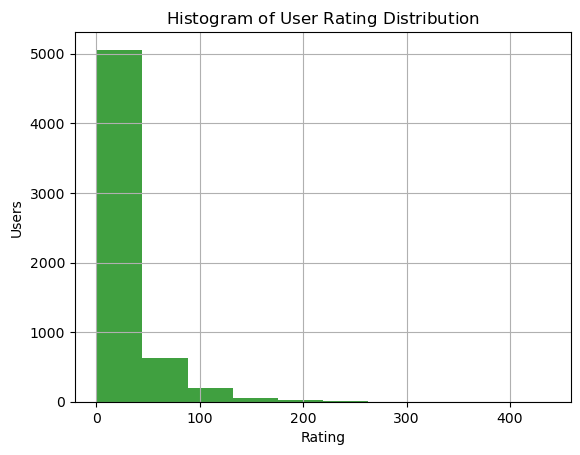

In [33]:
x = user_movie_rating_distribution.title
n, bins, patches = plt.hist(x, 10, facecolor='green', alpha=0.75)
plt.xlabel('Rating')
plt.ylabel('Users')
plt.title(r'$\mathrm{Histogram\ of\ User\ Rating\ Distribution}\ $')
plt.grid(True)
plt.show()

# (5) Recomendation System

In [34]:
from scipy.sparse import coo_matrix
small_set = data
user_codes = small_set.user_id.drop_duplicates().reset_index()
movie_codes = small_set.movie_id.drop_duplicates().reset_index()
user_codes.rename(columns={'index':'user_index'}, inplace=True)
movie_codes.rename(columns={'index':'movie_index'}, inplace=True)
movie_codes['mo_index_value'] = list(movie_codes.index)
user_codes['us_index_value'] = list(user_codes.index)
small_set = pd.merge(small_set, movie_codes,how='left')
small_set = pd.merge(small_set, user_codes,how='left')
mat_candidate = small_set[['us_index_value','mo_index_value','rating']]
data_array = mat_candidate.rating.values
row_array = mat_candidate.us_index_value.values
col_array = mat_candidate.mo_index_value.values
data_sparse = coo_matrix((data_array, (row_array, col_array)),dtype=float)
data_sparse

<5972x740 sparse matrix of type '<class 'numpy.float64'>'
	with 146857 stored elements in COOrdinate format>

Since we have converted our matrix into a sparse matrix, we will use the svds function provided by the
scipy library to break down our utility matrix into three different matrices. We can specify the number of latent factors we want to factorize our data.

The following code creates the decomposition of our matrix and predicts the recommendation for the same user as in the item similarity recommendation use case:

In [35]:
K=50

urm = data_sparse
MAX_PID = urm.shape[1]
MAX_UID = urm.shape[0]

import math as mt
from scipy.sparse.linalg import * #used for matrix multiplication
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix



def comp_svd(urm, K):
    U, s, Vt = svds(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(U, dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

def comp_est_matx(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 
    max_recommendation = 250
    estimatedRatings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    recomendRatings = np.zeros(shape=(MAX_UID,max_recommendation ), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        estimatedRatings[userTest, :] = prod.todense()
        recomendRatings[userTest, :] = (-estimatedRatings[userTest, :]).argsort()[:max_recommendation]
    return recomendRatings

U, S, Vt = comp_svd(urm, K)
uTest = [4129]





        

In [36]:
print("Predicted ratings:")
uTest_recommended_items = comp_est_matx(urm, U, S, Vt, uTest, K, True)
for user in uTest:
    print("Recommendation for user with user id {}". format(user))
rank_value = 1
for i in uTest_recommended_items[user,0:10]:
    movie_details = small_set[small_set.mo_index_value == i].drop_duplicates('mo_index_value')[['title','movie_id']]
    print("The number {} recommended movie is {} BY {}".format(rank_value, list(movie_details['title'])[0],list(movie_details['movie_id'])[0]))
    rank_value+=1

Predicted ratings:
Recommendation for user with user id 4129
The number 1 recommended movie is Almost Famous (2000) BY 3897
The number 2 recommended movie is Double Indemnity (1944) BY 3435
The number 3 recommended movie is Fantastic Voyage (1966) BY 3927
The number 4 recommended movie is Meet the Parents (2000) BY 3948
The number 5 recommended movie is Key Largo (1948) BY 3334
The number 6 recommended movie is Invisible Man, The (1933) BY 3932
The number 7 recommended movie is Abbott and Costello Meet Frankenstein (1948) BY 3928
The number 8 recommended movie is Voyage to the Bottom of the Sea (1961) BY 3926
The number 9 recommended movie is Creature From the Black Lagoon, The (1954) BY 3930
The number 10 recommended movie is Remember the Titans (2000) BY 3916
